In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.svm import SVC


In [2]:
df= pd.read_csv('train.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
x=df['Text']
y=df['Category']

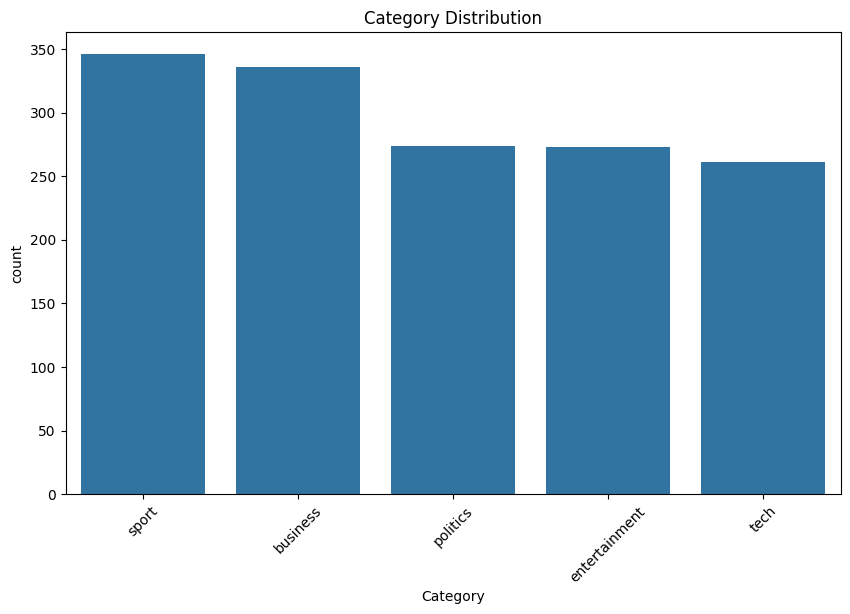

In [4]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df,order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()


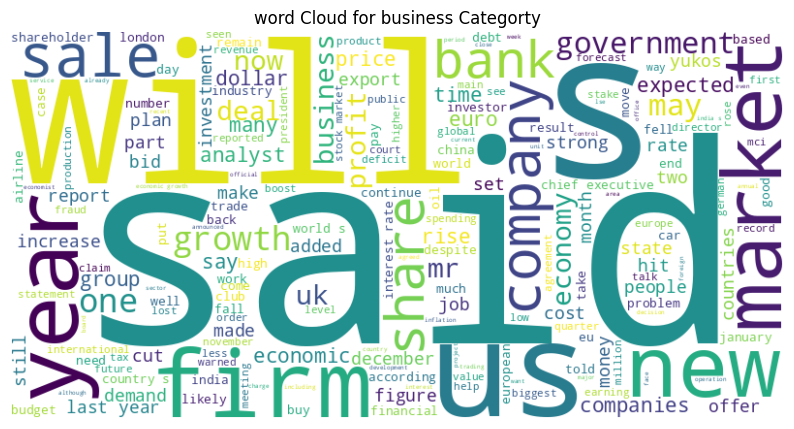

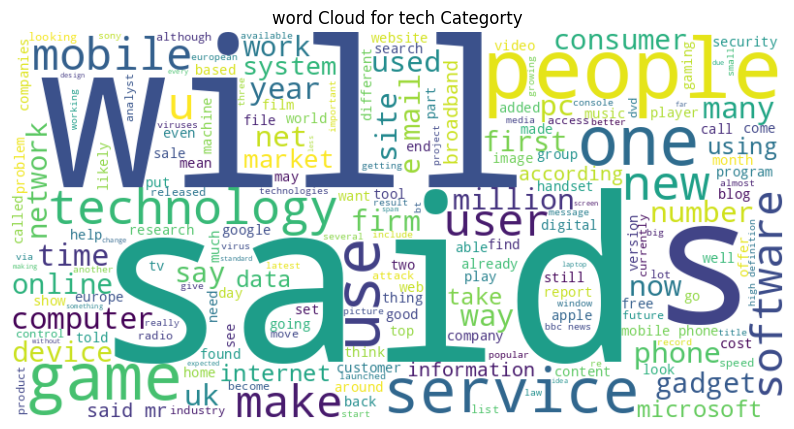

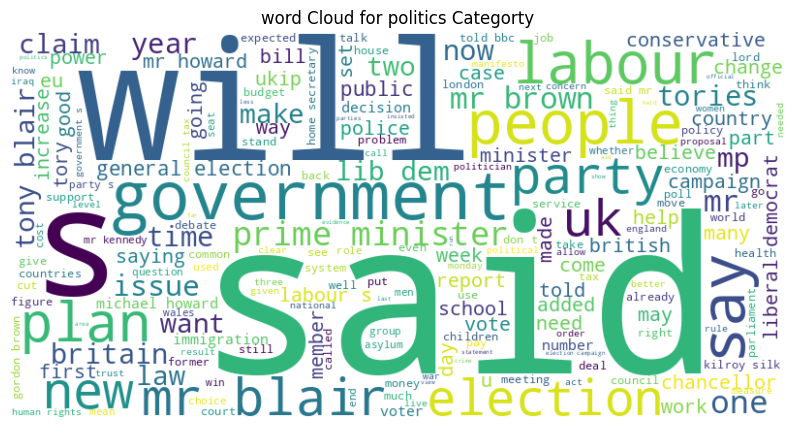

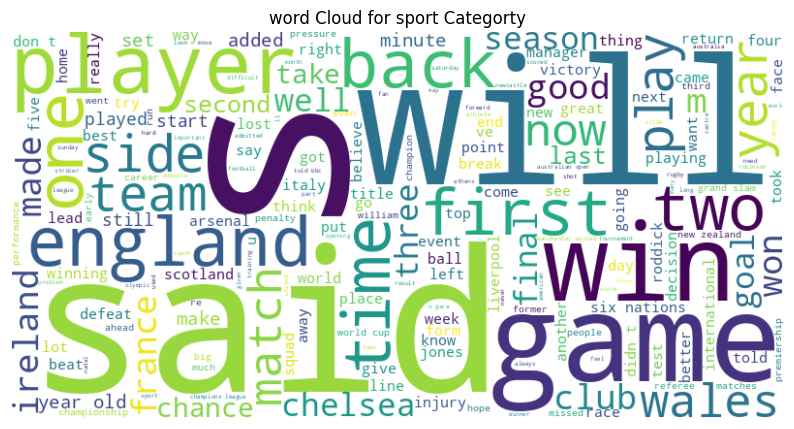

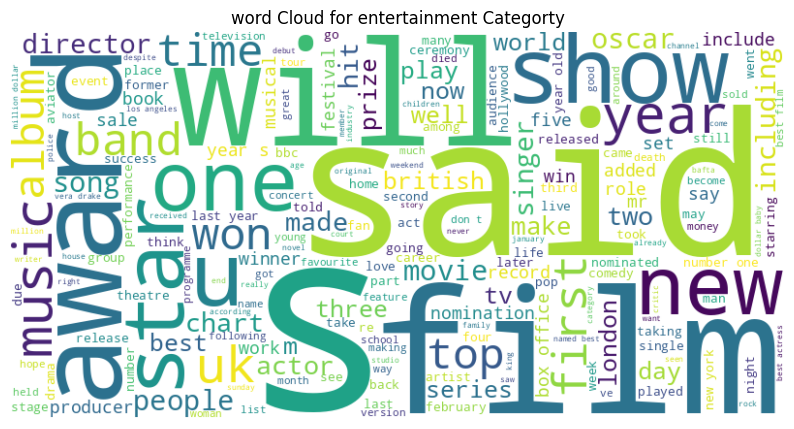

In [5]:
for category in df['Category'].unique():
    text = " ".join(df[df['Category']==category]['Text'].values)
    wordcloud = WordCloud(background_color='white', 
                          width=800,height=400).generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f'word Cloud for {category} Categorty')
    plt.axis("off")
    plt.show()

In [6]:
import nltk
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt_tab to
[nltk_data]     /var/home/ramrshrcg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /var/home/ramrshrcg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /var/home/ramrshrcg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
lemmatizer = WordNetLemmatizer()
stop_words= set(stopwords.words('english'))

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

print("hello!! Welcome to my world 1234!")
print(preprocess_text("hello!! Welcome to@@@ my world 1234!"))

hello!! Welcome to my world 1234!
hello welcome world


In [9]:
df['Text'] = df['Text'].apply(preprocess_text)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
lr_model = make_pipeline(TfidfVectorizer(), LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr= lr_model.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.9664429530201343
               precision    recall  f1-score   support

     business       0.92      0.97      0.95        75
entertainment       0.98      0.98      0.98        46
     politics       0.96      0.95      0.95        56
        sport       1.00      1.00      1.00        63
         tech       0.98      0.93      0.96        58

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



In [12]:
new_texts=[
    'The latest football match ended in a draw with great performances from both sides',
    'The government announced new hydropower plicies aimed at reducing carbon food'
]
new_predections=lr_model.predict(new_texts)

for text, prediction in zip(new_texts, new_predections):
    print(f'Text: {text} => Prediction: {prediction}')

Text: The latest football match ended in a draw with great performances from both sides => Prediction: sport
Text: The government announced new hydropower plicies aimed at reducing carbon food => Prediction: business


In [13]:
import joblib
joblib

SyntaxError: invalid syntax (2494350585.py, line 1)